In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.layers import RandomBrightness, RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import os
import warnings
warnings.filterwarnings('ignore')

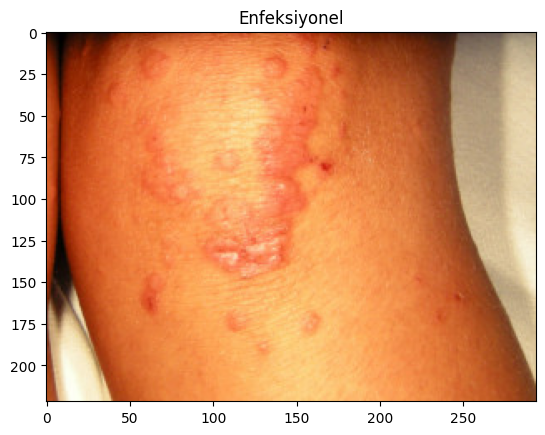

In [2]:
# 슬래시로 경로 설정
image_path = 'C:/Users/HB/Downloads/kaggle/train/1. Enfeksiyonel/0_20.jpg'

# 파일 존재 여부 확인
if not os.path.exists(image_path):
    print(f"File not found: {image_path}")
else:
    # 이미지 읽기
    img = cv2.imread(image_path)
    
    # 이미지가 제대로 로드되었는지 확인
    if img is None:
        print("Failed to load image.")
    else:
        # BGR에서 RGB로 변환
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # 이미지 시각화
        plt.imshow(img_rgb)
        plt.title('Enfeksiyonel')
        plt.show()


Text(0.5, 1.0, 'Red Channel')

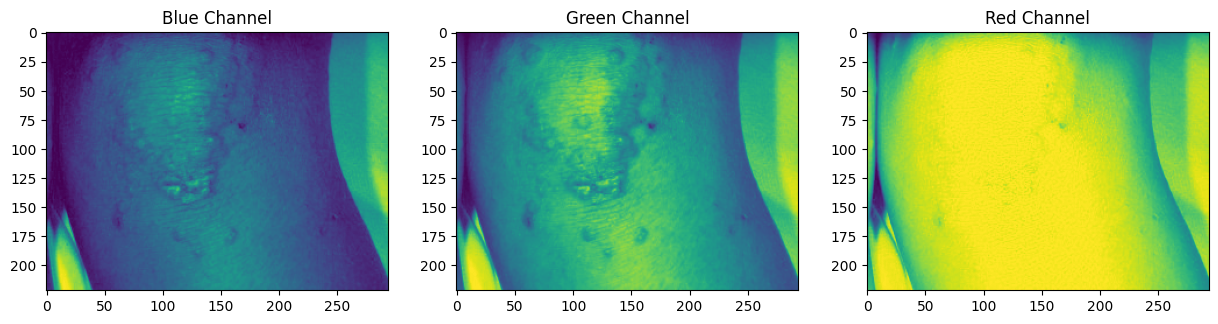

In [3]:
plt.figure(figsize = (15, 15))
b, g, r = cv2.split(img)

plt.subplot(1,3,1)
plt.imshow(b)
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g)
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r)
plt.title("Red Channel")

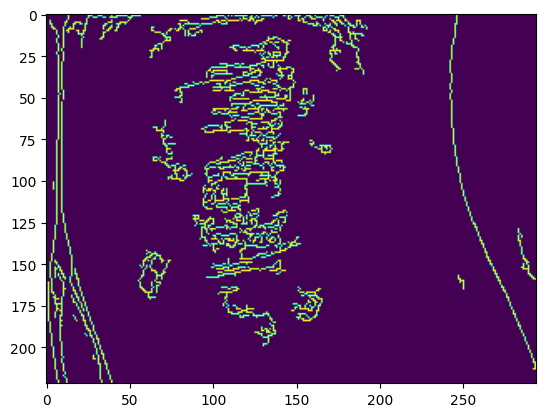

In [4]:
canny = cv2.Canny(img, 50, 170)
plt.imshow(canny)

Text(0.5, 1.0, 'Ekzama')

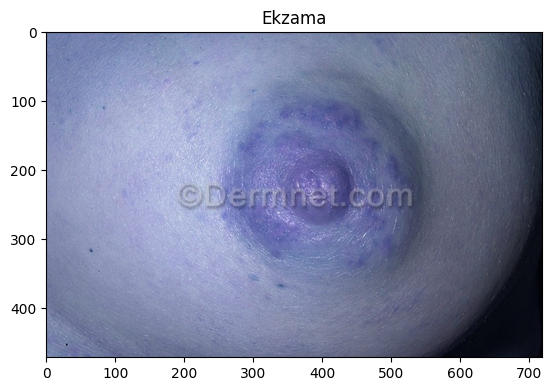

In [5]:
img = cv2.imread('C:/Users/HB/Downloads/kaggle/train/2. Ekzama/05AtopicAreola3.jpg')
plt.imshow(img)
plt.title('Ekzama')

Text(0.5, 1.0, 'Red Channel')

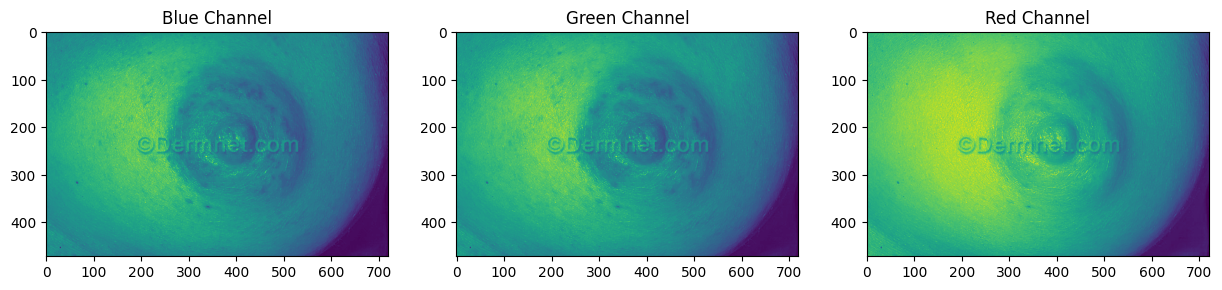

In [6]:
plt.figure(figsize = (15, 15))
b, g, r = cv2.split(img)

plt.subplot(1,3,1)
plt.imshow(b)
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g)
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r)
plt.title("Red Channel")

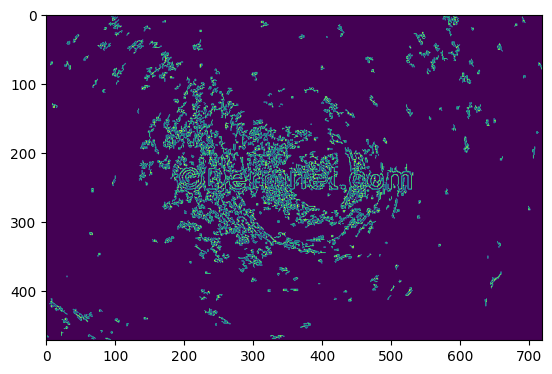

In [7]:
canny = cv2.Canny(img, 50, 170)
plt.imshow(canny)

Text(0.5, 1.0, 'Akne')

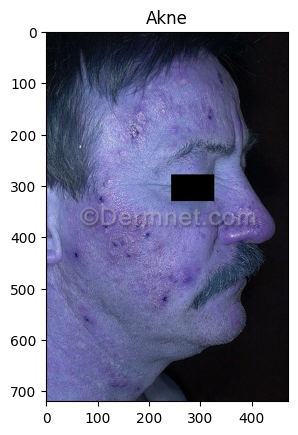

In [8]:
img = cv2.imread('C:/Users/HB/Downloads/kaggle/train/3. Akne/07RosaceaK0216.jpg')
plt.imshow(img)
plt.title('Akne')

Text(0.5, 1.0, 'Red Channel')

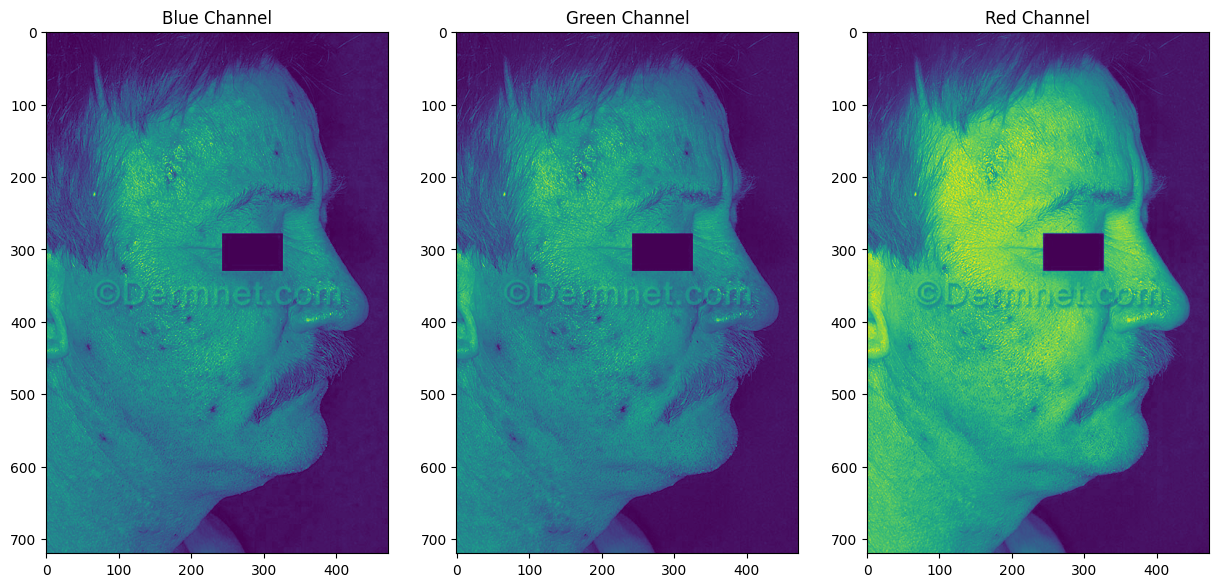

In [9]:
plt.figure(figsize = (15, 15))
b, g, r = cv2.split(img)

plt.subplot(1,3,1)
plt.imshow(b)
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g)
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r)
plt.title("Red Channel")

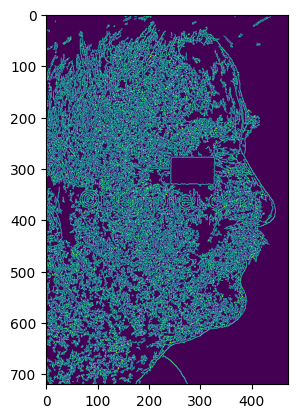

In [10]:
canny = cv2.Canny(img, 50, 170)
plt.imshow(canny)

Text(0.5, 1.0, 'Pigment')

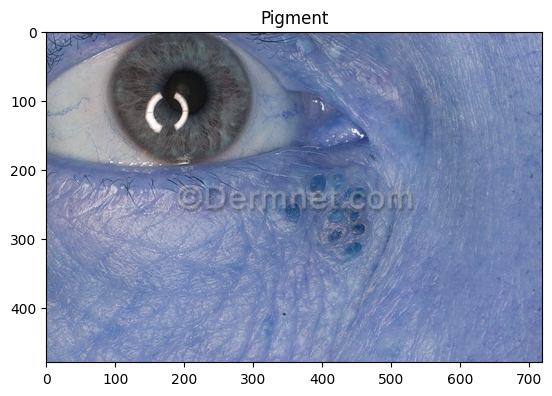

In [11]:
img = cv2.imread('C:/Users/HB/Downloads/kaggle/train/4. Pigment/actinic-comedones-10.jpg')
plt.imshow(img)
plt.title('Pigment')

Text(0.5, 1.0, 'Red Channel')

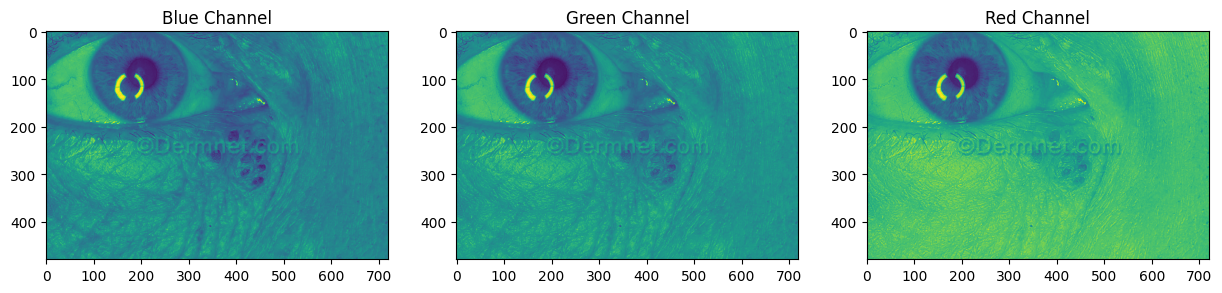

In [12]:
plt.figure(figsize = (15, 15))
b, g, r = cv2.split(img)

plt.subplot(1,3,1)
plt.imshow(b)
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g)
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r)
plt.title("Red Channel")

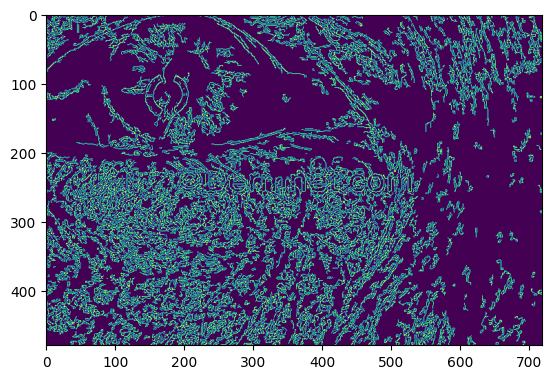

In [13]:
canny = cv2.Canny(img, 50, 170)
plt.imshow(canny)

Text(0.5, 1.0, 'Benign')

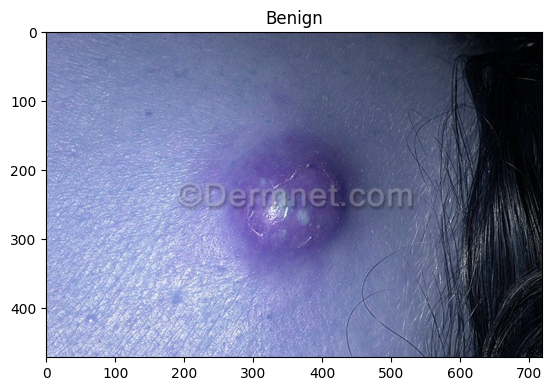

In [14]:
img = cv2.imread('C:/Users/HB/Downloads/kaggle/train/5. Benign/20RupturedCyst.jpg')
plt.imshow(img)
plt.title('Benign')

Text(0.5, 1.0, 'Red Channel')

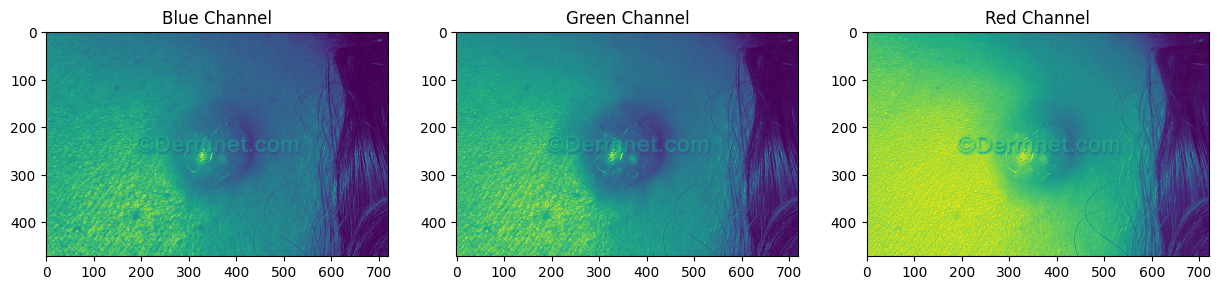

In [15]:
plt.figure(figsize = (15, 15))
b, g, r = cv2.split(img)

plt.subplot(1,3,1)
plt.imshow(b)
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g)
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r)
plt.title("Red Channel")

Text(0.5, 1.0, 'Malignant')

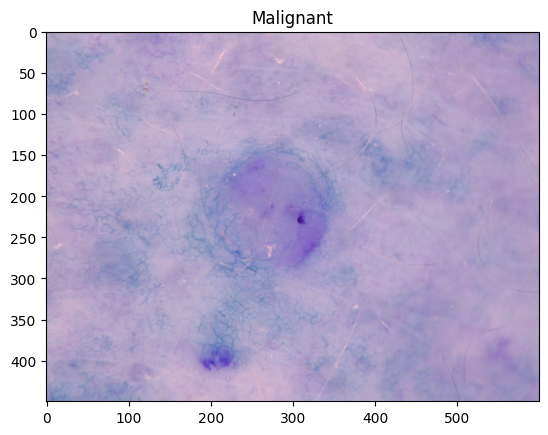

In [16]:
img = cv2.imread('C:/Users/HB/Downloads/kaggle/train/6. Malign/ISIC_0024572.jpg')
plt.imshow(img)
plt.title('Malignant')

Text(0.5, 1.0, 'Red Channel')

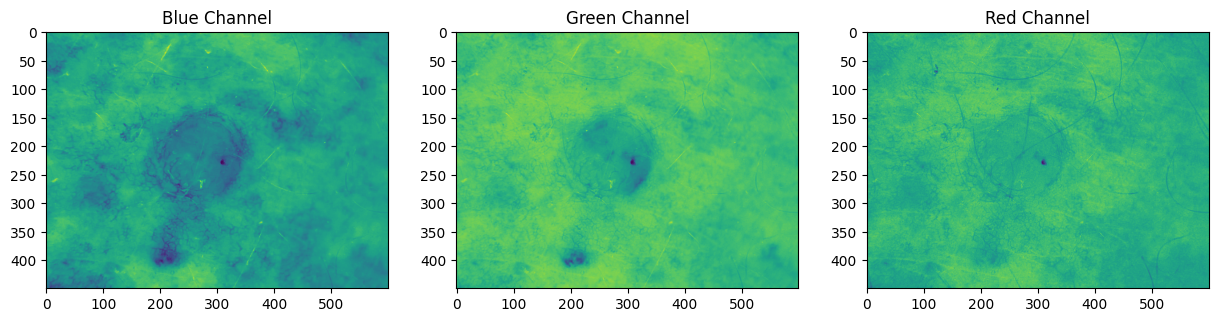

In [17]:
plt.figure(figsize = (15, 15))
b, g, r = cv2.split(img)

plt.subplot(1,3,1)
plt.imshow(b)
plt.title("Blue Channel")

plt.subplot(1,3,2)
plt.imshow(g)
plt.title("Green Channel")

plt.subplot(1,3,3)
plt.imshow(r)
plt.title("Red Channel")

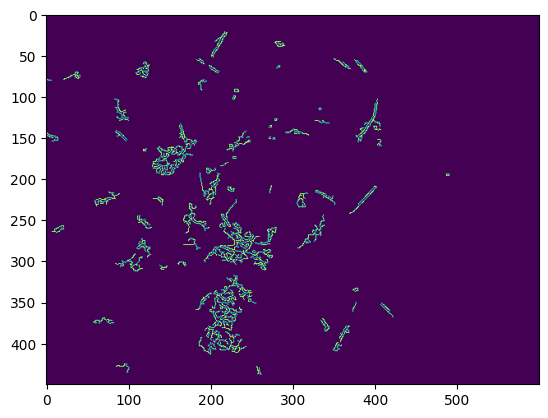

In [18]:
canny = cv2.Canny(img, 50, 170)
plt.imshow(canny)

In [19]:
img_width = 400
img_height = 400

In [20]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "C:/Users/HB/Downloads/kaggle/train"
test_dir =  "C:/Users/HB/Downloads/kaggle/test"
val_dir = "C:/Users/HB/Downloads/kaggle/val"

train_data = image_dataset_from_directory(train_dir,label_mode = "categorical", image_size = (img_height, img_width), batch_size = 16, shuffle = True, seed = 42)
test_data = image_dataset_from_directory(test_dir,label_mode = "categorical", image_size = (img_height, img_width), batch_size = 16, shuffle = True, seed = 42)
val_data = image_dataset_from_directory(val_dir,label_mode = "categorical", image_size = (img_height, img_width), batch_size = 16, shuffle = True, seed = 42)

Found 30909 files belonging to 6 classes.
Found 3928 files belonging to 6 classes.
Found 3923 files belonging to 6 classes.


In [21]:
def channel(img):
    _, g, _ = cv2.split(img)
    return(g)

In [22]:
augmentation = Sequential()

In [23]:
augmentation.add(RandomBrightness(factor = 0.1))
augmentation.add(RandomFlip(mode = 'horizontal_and_vertical')) 
augmentation.add(RandomRotation(factor = 0.2, fill_mode = 'nearest'))

In [24]:
augmentation.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [25]:
vgg19 = VGG19(input_shape = (img_height, img_width, 3), weights = 'imagenet', include_top = False)

In [26]:
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 100, 100, 128)     0     

In [27]:
vgg19.trainable = False

In [28]:
set_true = False

for layer in vgg19.layers:
    if layer.name == 'block5_conv1':
        layer.trainable = True
        set_true = True
    if set_true:
            layer.trainable = True 

In [29]:
for layer in vgg19.layers:
    print(f'Layer Name = {layer.name},      Trainable = {layer.trainable}')

Layer Name = input_1,      Trainable = False
Layer Name = block1_conv1,      Trainable = False
Layer Name = block1_conv2,      Trainable = False
Layer Name = block1_pool,      Trainable = False
Layer Name = block2_conv1,      Trainable = False
Layer Name = block2_conv2,      Trainable = False
Layer Name = block2_pool,      Trainable = False
Layer Name = block3_conv1,      Trainable = False
Layer Name = block3_conv2,      Trainable = False
Layer Name = block3_conv3,      Trainable = False
Layer Name = block3_conv4,      Trainable = False
Layer Name = block3_pool,      Trainable = False
Layer Name = block4_conv1,      Trainable = False
Layer Name = block4_conv2,      Trainable = False
Layer Name = block4_conv3,      Trainable = False
Layer Name = block4_conv4,      Trainable = False
Layer Name = block4_pool,      Trainable = False
Layer Name = block5_conv1,      Trainable = True
Layer Name = block5_conv2,      Trainable = True
Layer Name = block5_conv3,      Trainable = True
Layer Name =

In [30]:
model = Sequential()

In [31]:
model.add(augmentation)
model.add(vgg19)
#model.add(Flatten())
model.add(Dropout(0.4))
#model.add(Dense(3000, activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(1500, activation = 'relu'))
#model.add(Dropout(0.2))
#model.add(Dense(500, activation = 'relu'))
model.add(GlobalAveragePooling2D())
model.add(Dense(6, activation = 'softmax'))

In [32]:
adam = Adam(learning_rate = 0.0001)

In [33]:
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [34]:
# 모델 빌드 및 요약 출력
model.build((None, img_height, img_width, 3))  # 입력 크기 지정
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 400, 400, 3)       0         
                                                                 
 vgg19 (Functional)          (None, 12, 12, 512)       20024384  
                                                                 
 dropout (Dropout)           (None, 12, 12, 512)       0         
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 6)                 3078      
                                                                 
Total params: 20,027,462
Trainable params: 3,078
Non-trainable params: 20,024,384
______________________________________

In [35]:
# setting up a checkpoint based on the best validation accuracy, so far been discovered
chk_path = '/kaggle/working/bestmodel.keras'

checkpoint = ModelCheckpoint(filepath = chk_path, monitor='val_accuracy', mode='max', save_best_only = True, verbose = 1)

In [36]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 3, mode = 'max', verbose = 1)

In [37]:
history = model.fit(train_data, validation_data = val_data, epochs = 100, batch_size = 128, callbacks = [early_stopping, checkpoint])

Epoch 1/100
1932/1932 [==============================] - ETA: 0s - loss: 1.6474 - accuracy: 0.4340 
Epoch 1: val_accuracy improved from -inf to 0.51721, saving model to /kaggle/working\bestmodel.keras
1932/1932 [==============================] - 45266s 23s/step - loss: 1.6474 - accuracy: 0.4340 - val_loss: 1.3626 - val_accuracy: 0.5172
Epoch 2/100
1932/1932 [==============================] - ETA: 0s - loss: 1.2443 - accuracy: 0.5180 
Epoch 2: val_accuracy improved from 0.51721 to 0.55723, saving model to /kaggle/working\bestmodel.keras
1932/1932 [==============================] - 30396s 16s/step - loss: 1.2443 - accuracy: 0.5180 - val_loss: 1.2288 - val_accuracy: 0.5572
Epoch 3/100
1932/1932 [==============================] - ETA: 0s - loss: 1.1432 - accuracy: 0.5532 
Epoch 3: val_accuracy improved from 0.55723 to 0.57966, saving model to /kaggle/working\bestmodel.keras
1932/1932 [==============================] - 30797s 16s/step - loss: 1.1432 - accuracy: 0.5532 - val_loss: 1.1454 - v

KeyboardInterrupt: 

In [ ]:
best_model = load_model(chk_path)

loss, acc = best_model.evaluate(test_data)

print(f"\nAccuracy = {acc}\nLoss = {loss}")

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'], label = 'val accuracy', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.grid()

In [ ]:
plt.plot(history.history['loss'], label = 'Train Loss', color = 'blue')
plt.plot(history.history['val_loss'], label = 'Val Loss', color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.grid()